# 6.1. Multiclass Classification with CNN for the Fashion MNIST Dataset
* "시작하세요! 텐서플로우 2.0 프로그래밍",
  * 6.3. Fashion MNIST 데이터세트에 적용하기, pp.150-161
  * 6.4. 퍼포먼스 높이기, pp.161-172

In [1]:
def show_an_image( numpy_ndarray, cmap=None ):
  # Fashion MNIST Dataset
  import matplotlib.pyplot as plt

  plt.imshow( numpy_ndarray, cmap )
  plt.colorbar()
  plt.show()

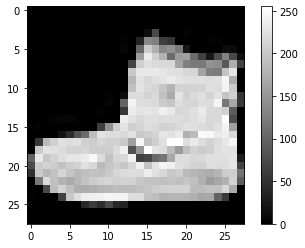

In [2]:
import tensorflow as tf

fashion_mnist_module = tf.keras.datasets.fashion_mnist
(train_x, train_y), (test_x, test_y) = fashion_mnist_module.load_data()

show_an_image( train_x[0], cmap='gray')

In [ ]:
# Normalize data
train_x = train_x / 255.0
test_x = test_x / 255.0

CNN에 쓰이는 Conv2D 레이어는 채널을 가진 형태의 데이터를 받도록 설정되어 있으므로 채널을 가지도록 데이터의 shape을 바꿉니다.

In [14]:
train_x.shape, test_x.shape

((60000, 28, 28), (10000, 28, 28))

In [15]:
train_x = train_x.reshape(-1, 28, 28, 1)
test_x = test_x.reshape(-1, 28, 28, 1)

In [16]:
train_x.shape, test_x.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

흑백 이미지는 1개의 채널을 갖습니다. reshape()함수로 제일 뒤쪽에 채널 차원을 추가합니다. x1을 곱해준 것이므로 데이터 수는 달라지지 않습니다.
> 6000 x 28 x 28 = 6000 x 28 x 28 x 1

## 컨볼루션 신경망 모델 정의

In [23]:
model = tf.keras.Sequential( [
    tf.keras.layers.Conv2D( input_shape=(28,28,1), kernel_size=(3,3), filters=16 ),
    tf.keras.layers.Conv2D( kernel_size=(3,3), filters=32 ),
    tf.keras.layers.Conv2D( kernel_size=(3,3), filters=64 ),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense( units=128, activation='relu' ),
    tf.keras.layers.Dense( units=10, activation='softmax' )
] )
model.compile( optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'] )
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten_3 (Flatten)          (None, 30976)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               3965056   
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 3,989,642
Trainable params: 3,989,642
Non-trainable params: 0
____________________________________________

## 모델 학습

In [25]:
history = model.fit( train_x, train_y, epochs=25, validation_split=0.25 )

ValueError: Error when checking input: expected conv2d_9_input to have 4 dimensions, but got array with shape (60000, 28, 28)